In [23]:
#### Ethnicity
import pandas as pd
import sqlite3
from contextlib import closing
import psycopg2

nct_id_list = ["NCT00396162", "NCT00849277", "NCT01249911", "NCT01510938", "NCT01782755", "NCT01935986", 
             "NCT02367612", "NCT02462590", "NCT03683927", "NCT03695432", "NCT04603456", "NCT05175833"]
def extract_aact(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, param_value, classification, category
            FROM baseline_measurements
            WHERE (title = 'Race (NIH/OMB)' OR title = 'Race/Ethnicity, Customized')
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'number',
        'classification',
        'category',
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_race= extract_aact(nct_id_list)
print(extracted_race)


max_result_group_id = extracted_race.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_race = extracted_race[extracted_race['result_group_id'] == max_result_group_id]

print(filtered_extracted_race)

filtered_extracted_race.loc[filtered_extracted_race['category'].isnull(), 'category'] = filtered_extracted_race['classification']

category_mapping = {
    'Black': 'Black or African American',
    'BLACK OR AFRICAN AMERICAN' : 'Black or African American',
    'Black Or African American' : 'Black or African American',
    'ASIAN' : 'Asian',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian or Other Pacific Islander',
    'Native Hawaiian or Pacific Islander':'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White',
    'AMERICAN INDIAN OR ALASKA NATIVE': 'American Indian or Alaska Native',
    'American Indian Or Alaska Native': 'American Indian or Alaska Native',
    'WHITE': 'White',
    'Unknown': 'Unknown or Not Reported',
    'Missing': 'Unknown or Not Reported',
    'Other': 'Unknown or Not Reported',
    'OTHER' : 'Unknown or Not Reported',
    'MISSING': 'Unknown or Not Reported',
    'No ethnicity': 'Unknown or Not Reported',
    'Other, not specified': 'Unknown or Not Reported',
    'Multiple': 'Unknown or Not Reported'
}

categories_to_remove = ["HISPANIC OR LATINO", "NOT HISPANIC OR LATINO","NOT KNOWN, NOT RECORDED, OR REFUSED"]

filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)
filtered_extracted_race = filtered_extracted_race[~filtered_extracted_race['category'].isin(categories_to_remove)]
filtered_extracted_race = filtered_extracted_race.drop('classification', axis=1)
# Specify the file name for your CSV
race = "filtered_extracted_race.csv"

# Save the DataFrame to a CSV file
filtered_extracted_race.to_csv(race, index=False)




Empty DataFrame
Columns: [nct_id, result_group_id, ctgov_group_code, number, classification, category]
Index: []
Empty DataFrame
Columns: [nct_id, result_group_id, ctgov_group_code, number, classification, category]
Index: []


In [12]:
num_unique_values = filtered_extracted_race['category'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_race['category'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 0
Unique values in 'category':
[]


nct_ids in the list but not in the extracted data: {'NCT02034916', 'NCT00679783'}
2 studies no ethnicities

nct_ids in the list but not in the extracted data: {'NCT03343054', 'NCT01818063', 'NCT02734004', 'NCT02657889', 'NCT01905592', 'NCT04690855', 'NCT01506609'}

1st study: Age, customized in title, : <18,18-44, 45-64, >65 in classification
2nd study: Age, categorical in title, , <18, 18-65, >65, in category
3rd study: Age, categorical in title, <18, 18-65, >65, in category
4th study: Age, categorical in title:  as above
5th study: Age, customized: 18-64, 65-74, >75 in category
6th study: Age, categorical in title in category
7t study: Age, customized, <45, 45-64, >65 in category






In [24]:
### Age with custom and categorical
nct_id_list = ["NCT00396162", "NCT00849277", "NCT01249911", "NCT01510938", "NCT01782755", "NCT01935986", 
             "NCT02367612", "NCT02462590", "NCT03683927", "NCT03695432", "NCT04603456", "NCT05175833"]

def extract_aact_age_extra(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT m.nct_id, m.result_group_id, m.classification, m.category, m.title, m.param_value, b.count, m.dispersion_type, m.dispersion_value
        FROM baseline_measurements m
        LEFT JOIN baseline_counts b on m.result_group_id=b.result_group_id
        WHERE (title = 'Age, Continuous')
        AND m.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});;
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'result_group_id',
        'classification',
        'category',
        'title',
        'number',
        'total_count',
        'dispersion_type',
        'dispersion_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    


extracted_age_extra= extract_aact_age_extra(nct_id_list)
print(extracted_age_extra)


max_result_group_id = extracted_age_extra.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_age_extra = extracted_age_extra[extracted_age_extra['result_group_id'] == max_result_group_id]

# Specify the file name for your CSV
age_extra = "filtered_extracted_age_extra.csv"

# Save the DataFrame to a CSV file
filtered_extracted_age_extra.to_csv(age_extra, index=False)


1
        nct_id  result_group_id classification category            title  \
0  NCT00396162         75251071           None     None  Age, Continuous   
1  NCT00396162         75251070           None     None  Age, Continuous   
2  NCT00396162         75251069           None     None  Age, Continuous   

  number  total_count     dispersion_type dispersion_value  
0   49.5           77  Standard Deviation               10  
1   49.6           38  Standard Deviation              8.6  
2   49.4           39  Standard Deviation             12.6  


In [25]:
# Ensure that 'number' and 'total_count' columns are numeric
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')

# Calculate the product
filtered_extracted_age_extra['product'] = filtered_extracted_age_extra['number'] * filtered_extracted_age_extra['total_count']

# Calculate the sum of the product
total_sum = filtered_extracted_age_extra['product'].sum()

# Calculate the sum of 'total_count'
total_participants = filtered_extracted_age_extra['total_count'].sum()

# Calculate the average age
# Check if total_participants is not zero to avoid division by zero
if total_participants != 0:
    average_age = total_sum / total_participants
    print("Average Age:", average_age)
else:
    print("Total number of participants is zero, cannot compute average age.")

Average Age: 49.5


/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_58068/147986295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_58068/147986295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0ds

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_58068/317986369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_58068/317986369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0d

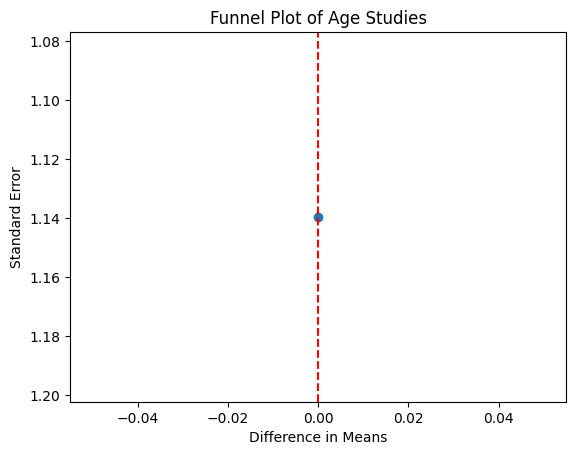

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


filtered_extracted_age_extra

# Convert columns to appropriate types
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
filtered_extracted_age_extra['dispersion_value'] = pd.to_numeric(filtered_extracted_age_extra['dispersion_value'], errors='coerce')

# Filter rows where necessary data is available
filtered_extracted_age_extra = filtered_extracted_age_extra[filtered_extracted_age_extra['dispersion_type'] == 'Standard Deviation']
filtered_extracted_age_extra= filtered_extracted_age_extra.dropna(subset=['number', 'total_count', 'dispersion_value'])

# Calculate difference in means and standard error
overall_mean = (total_sum/total_participants)
filtered_extracted_age_extra['difference_in_means'] = filtered_extracted_age_extra['number'] - overall_mean
filtered_extracted_age_extra['standard_error'] = filtered_extracted_age_extra['dispersion_value'] / np.sqrt(filtered_extracted_age_extra['total_count'])

# Create funnel plot
plt.scatter(filtered_extracted_age_extra['difference_in_means'], filtered_extracted_age_extra['standard_error'])
plt.xlabel('Difference in Means')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.axvline(x=0, color='red', linestyle='--')
plt.gca().invert_yaxis() # Inverting y-axis for better interpretation of funnel plot
plt.show()


In [16]:
num_unique_values = filtered_extracted_age_extra['nct_id'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_age_extra['nct_id'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 1
Unique values in 'category':
['NCT00396162']


In [17]:
### trial design

nct_id_list = ["NCT00396162", "NCT00849277", "NCT01249911", "NCT01510938", "NCT01782755", "NCT01935986", 
             "NCT02367612", "NCT02462590", "NCT03683927", "NCT03695432", "NCT04603456", "NCT05175833"]

def extract_aact_design(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT nct_id, allocation, intervention_model, masking, subject_masked, caregiver_masked, investigator_masked, outcomes_assessor_masked
        FROM designs
        WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'allocation',
        'intervention_model',
        'masking',
        'subject_masked',
        'caregiver_masked',
        'investigator_masked',
        'outcomes_assessor_masked'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_designs= extract_aact_design(nct_id_list)
print(extracted_designs)

# Specify the file name for your CSV
designs = "extracted_designs.csv"

# Save the DataFrame to a CSV file
extracted_designs.to_csv(designs, index=False)




12
         nct_id  allocation    intervention_model            masking  \
0   NCT00396162  Randomized   Parallel Assignment             Triple   
1   NCT02367612  Randomized   Parallel Assignment             Triple   
2   NCT01782755  Randomized   Parallel Assignment          Quadruple   
3   NCT03683927  Randomized   Parallel Assignment             Triple   
4   NCT01935986  Randomized   Parallel Assignment          Quadruple   
5   NCT01249911  Randomized   Parallel Assignment          Quadruple   
6   NCT02462590  Randomized   Parallel Assignment          Quadruple   
7   NCT03695432  Randomized  Factorial Assignment             Single   
8   NCT04603456  Randomized   Parallel Assignment  None (Open Label)   
9   NCT00849277  Randomized   Parallel Assignment          Quadruple   
10  NCT05175833  Randomized   Parallel Assignment          Quadruple   
11  NCT01510938  Randomized   Parallel Assignment             Triple   

   subject_masked caregiver_masked investigator_masked  \
0 

In [18]:

### interventions

nct_id_list = ["NCT00396162", "NCT00849277", "NCT01249911", "NCT01510938", "NCT01782755", "NCT01935986", 
             "NCT02367612", "NCT02462590", "NCT03683927", "NCT03695432", "NCT04603456", "NCT05175833"]

def extract_aact_intervention(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT d.nct_id, d.intervention_id, i.name, i.description, de.title
        FROM design_group_interventions d
        LEFT JOIN interventions i on d.intervention_id=i.id
        LEFT JOIN design_groups de on de.id=d.design_group_id
        WHERE d.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'intervention_id',
        'name',
        'description',
        'title'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_intervention= extract_aact_intervention(nct_id_list)
print(extracted_intervention)



# Specify the file name for your CSV
interventions = "extracted_interventions.csv"

# Save the DataFrame to a CSV file
extracted_intervention.to_csv(interventions, index=False)



11
         nct_id  intervention_id  \
0   NCT01249911         74990332   
1   NCT01249911         74990333   
2   NCT01935986         74648100   
3   NCT01935986         74648101   
4   NCT02462590         74226978   
5   NCT02462590         74226979   
6   NCT03695432         74231467   
7   NCT03695432         74231468   
8   NCT03695432         74231469   
9   NCT03695432         74231470   
10  NCT05175833         74261216   
11  NCT05175833         74261217   
12  NCT04603456         74719950   
13  NCT04603456         74719951   
14  NCT04603456         74719952   
15  NCT03683927         74307172   
16  NCT03683927         74307173   
17  NCT00396162         74938756   
18  NCT00396162         74938757   
19  NCT01510938         74612471   
20  NCT01510938         74612472   
21  NCT02367612         74465569   
22  NCT02367612         74465570   
23  NCT01782755         74637279   
24  NCT01782755         74637280   

                                                 name  \
0  

In [19]:
#### sex


nct_id_list = ["NCT00396162", "NCT00849277", "NCT01249911", "NCT01510938", "NCT01782755", "NCT01935986", 
             "NCT02367612", "NCT02462590", "NCT03683927", "NCT03695432", "NCT04603456", "NCT05175833"]

def extract_aact_sex(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, category,title, param_value
            FROM baseline_measurements
            WHERE (title ='Sex: Female, Male' )
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'category',
        'title',
        'param_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_sex= extract_aact_sex(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_sex.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_sex = extracted_sex[extracted_sex['result_group_id'] == max_result_group_id]



# Specify the file name for your CSV
sex = "filtered_extracted_sex.csv"

# Save the DataFrame to a CSV file
filtered_extracted_sex.to_csv(sex, index=False)



In [20]:
#### outcomes


nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']


def extract_aact_outcomes(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, outcome_type, measure
            FROM design_outcomes
            WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])}) ;
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'outcome_type',
        'measure'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)

extracted_outcomes= extract_aact_outcomes(nct_id_list)
    
print(extracted_outcomes)

          nct_id outcome_type  \
0    NCT00285649      primary   
1    NCT04209335      primary   
2    NCT04209335    secondary   
3    NCT04209335    secondary   
4    NCT04209335    secondary   
..           ...          ...   
360  NCT02391350        other   
361  NCT02355275      primary   
362  NCT02355275    secondary   
363  NCT01841216      primary   
364  NCT01841216    secondary   

                                               measure  
0    Roland Morris Low Back Pain Disability Questio...  
1                                Core Muscle Endurance  
2                                      Body Mass Index  
3                Physical Activity Level Questionnaire  
4    Number of Participants Who Have Experienced No...  
..                                                 ...  
360        Number of Participants Utilizing Healthcare  
361                          Oswestry Disability Index  
362                          Numeric Pain Rating Scale  
363  Percent of Maximal Voluntary